In [1]:
import os
import matplotlib as mpl
import pandas as pd

figure_folder = r'C:\Users\cosmosyw\Documents\Research\Mecp2_v2\analysis\figures\mecp2_mutations'

mpl.rc('figure', dpi=300)
mpl.rc('figure', titlesize=9.) 
mpl.rc('figure.constrained_layout', use=True)

mpl.rc('axes', labelsize=7.)
mpl.rc('axes', titlesize=8.)
mpl.rc('axes', linewidth=0.5)

mpl.rc('font', family='Arial')

mpl.rc('savefig', dpi=300)
mpl.rc('savefig', format='pdf')

mpl.rc('xtick', labelsize=6.5)
mpl.rc('xtick.major', size=3)
mpl.rc('xtick.major', width=0.5)

mpl.rc('ytick', labelsize=6.5)
mpl.rc('ytick.major', size=3)
mpl.rc('ytick.major', width=0.5)

mpl.rcParams['pdf.fonttype'] = 42

In [4]:
df_ko = pd.read_csv(r'resources\Boxer_Mecp2_KO_result_df_allRP.csv', index_col=0)
df_r306C = pd.read_csv(r'resources\Boxer_Mecp2_R306C_result_df_all_Rp.csv', index_col=0)

In [6]:
import numpy as np
def get_upper_bound(all_values, bin_size=10):
    percentiles = np.arange(0,100, bin_size)
    percentiles = percentiles + bin_size
    upper_bound = []
    for p in percentiles:
        upper_bound.append(np.percentile(all_values, p))
    upper_bound = np.array(upper_bound)
    return upper_bound

upper_bound = get_upper_bound(df_ko['radial_position'].values)
df_ko['rp_interval'] = df_ko['radial_position'].apply(lambda x: np.argmax(upper_bound>=x))

upper_bound = get_upper_bound(df_r306C['radial_position'].values)
df_r306C['rp_interval'] = df_r306C['radial_position'].apply(lambda x: np.argmax(upper_bound>=x))

meta NOT subset; don't know how to subset; dropped


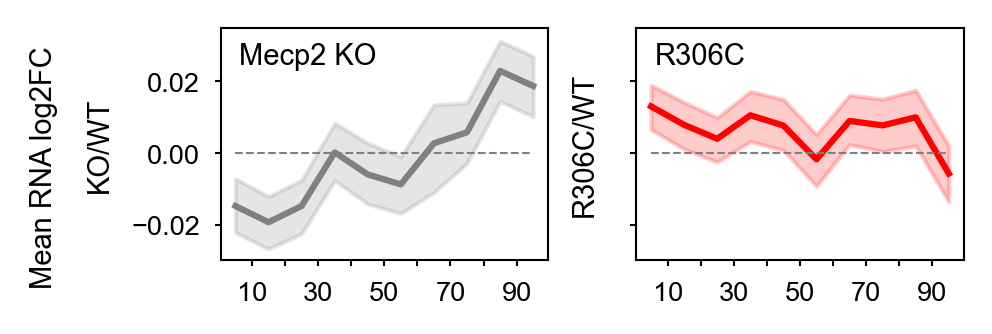

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(3,1), dpi=300)


#####  
ax1 = fig.add_subplot(121)

sns.lineplot(data=df_ko, x='rp_interval', y='log2FoldChange', ax=ax1, color='gray')

ax1.plot([0,9], [0,0], color='gray', linewidth=0.5, linestyle='--')

ax1.set_xticks([])
ax1.set_xlabel(None)
ax1.set_ylabel('KO/WT', fontsize=7)
ax1.set_yticks([-0.02, 0, 0.02, 0.04])
ax1.set_ylim(-0.03,0.035)
ax1.text(0.1,0.025, 'Mecp2 KO', fontsize=7)
ax1.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5],[10,'',30,'',50,'',70,'',90], fontsize=6.5)
ax1.tick_params(axis='both',length=1.5)
####
ax2 = fig.add_subplot(122)

sns.lineplot(data=df_r306C, x='rp_interval', y='log2FoldChange', ax=ax2, color='red')

ax2.plot([0,9], [0,0], color='gray', linewidth=0.5, linestyle='--')

ax2.set_xticks([])
ax2.set_xlabel(None)
ax2.set_ylabel('R306C/WT', fontsize=7)
ax2.set_yticks([-0.02, 0, 0.02, 0.04],['','','',''])
ax2.set_ylim(-0.03,0.035)
ax2.text(0.1,0.025, 'R306C', fontsize=7)
ax2.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5],[10,'',30,'',50,'',70,'',90], fontsize=6.5)
ax2.tick_params(axis='both',length=1.5)

fig.supylabel('Mean RNA log2FC', x=-0.05, fontsize=7)

import os
figure_name = 'Boxer_mutation.pdf'
plt.savefig(figure_name)

plt.show()